<a href="https://colab.research.google.com/github/AbhayNath001/Code_Clause_Breast_Cancer_Classification/blob/main/CodeClause(Abhay_Nath).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter mean radius: 22
Enter mean texture: 16
Enter mean perimeter: 100
Enter mean area: 1006
Enter mean smoothness: 0.1546
Prediction: It may not be a sign of breast cancer.
Probability of Normal: 0.6666666666666666
Probability of Cancer: 0.3333333333333333


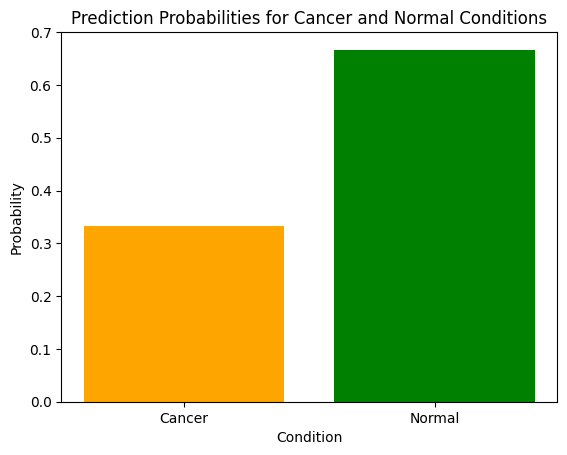

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

data = pd.read_csv('Breast_cancer_data.csv')
features = data[['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness']]
target = data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
#---------------getting user input------------------------------------------------------------------------------
mean_radius = float(input('Enter mean radius: '))
mean_texture = float(input('Enter mean texture: '))
mean_perimeter = float(input('Enter mean perimeter: '))
mean_area = float(input('Enter mean area: '))
mean_smoothness = float(input('Enter mean smoothness: '))

new_data = pd.DataFrame([[mean_radius, mean_texture, mean_perimeter, mean_area, mean_smoothness]], columns=['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness'])
prediction = knn.predict(new_data)
prediction_probability = knn.predict_proba(new_data)[0]

if prediction == 1:
  print('Prediction: It may be a sign of breast cancer.')
  print('Probability of Cancer:', prediction_probability[1])
  print('Probability of Normal:', prediction_probability[0])
else:
  print('Prediction: It may not be a sign of breast cancer.')
  print('Probability of Normal:', prediction_probability[0])
  print('Probability of Cancer:', prediction_probability[1])
conditions = ['Cancer', 'Normal']
probabilities = [prediction_probability[1], prediction_probability[0]]
colors = ['orange', 'green']
#---------------------------------plot a graph---------------------------------------------
plt.bar(conditions, probabilities, color=colors)
plt.xlabel('Condition')
plt.ylabel('Probability')
plt.title('Prediction Probabilities for Cancer and Normal Conditions')
plt.show()
